<a href="https://colab.research.google.com/github/Raghava2004-cpu/KNeighborsClassifier/blob/main/CUSTOMER_SEGMENTATION_USING_KMEANS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape

(200, 5)

In [4]:
df.isnull().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


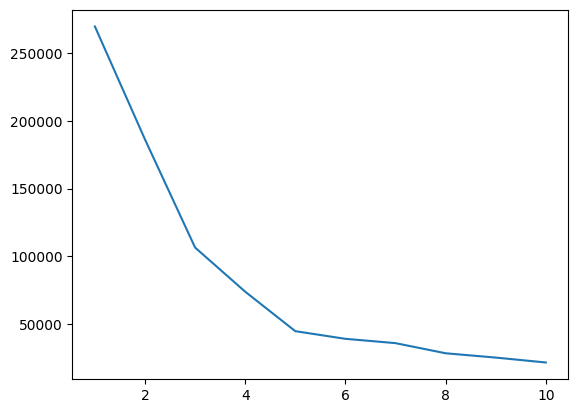

In [5]:
X = df[['Annual Income (k$)' , 'Spending Score (1-100)']]
wcss = []
for i in range(1,11):
   model = KMeans(n_clusters = i)
   model.fit_predict(X)
   wcss.append(model.inertia_)

plt.plot(range(1,11) , wcss )

from the elbow technique we conclude that the Best K value is 5

In [6]:
new_model  = KMeans(n_clusters  = 5)
df['Clusters'] = new_model.fit_predict(X)

In [7]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,1,Male,19,15,39,2
1,2,Male,21,15,81,1
2,3,Female,20,16,6,2
3,4,Female,23,16,77,1
4,5,Female,31,17,40,2


In [9]:
df0 = df[df['Clusters'] == 0]
df1 = df[df['Clusters'] == 1]
df2 = df[df['Clusters'] == 2]
df3 = df[df['Clusters'] == 3]
df4 = df[df['Clusters'] == 4]


In [10]:
new_model.cluster_centers_

array([[55.2962963 , 49.51851852],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571]])

Text(0, 0.5, 'Spending Score (1-100)')

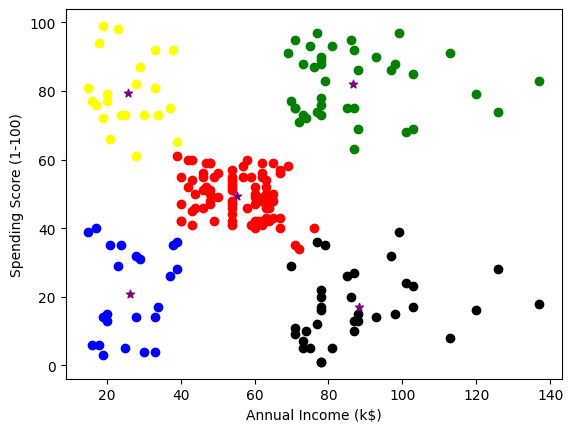

In [14]:
plt.scatter(df0['Annual Income (k$)'] , df0['Spending Score (1-100)'] , color = 'red' )
plt.scatter(df1['Annual Income (k$)'] , df1['Spending Score (1-100)'] , color = 'yellow' )
plt.scatter(df2['Annual Income (k$)'] , df2['Spending Score (1-100)'] , color = 'blue' )
plt.scatter(df3['Annual Income (k$)'] , df3['Spending Score (1-100)'] , color = 'green' )
plt.scatter(df4['Annual Income (k$)'] , df4['Spending Score (1-100)'] , color = 'black' )
plt.scatter(new_model.cluster_centers_[: , 0] , new_model.cluster_centers_[: , 1] , color = 'purple' , marker = '*')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')